<a href="https://colab.research.google.com/github/Rameshkumar789/Computational-Menthods-INFO-5731/blob/main/Korlakunta_In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [9]:
#Write your code here.
import pandas as pd

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from textblob import Word
nltk.download('wordnet')

from nltk.stem import PorterStemmer
from google.colab import files

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
uploaded = files.upload()

In [11]:
df=pd.read_csv("/content/women_reviews.csv")

In [12]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [13]:
# Removing Empty rows

df = df[df['Review Text'].notnull()]
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


## Data Cleaning

In [ ]:
stop = stopwords.words('english')
st = PorterStemmer()

df['cleaned_text']=df['Review Text']

#Noise
df['cleaned_text']=df['cleaned_text'].str.replace(r'[^\w\s]+', '')

#Numbers
df['cleaned_text']= df['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

#Stopwords removal
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Lower casing
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Stemming
temp=PorterStemmer()
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([temp.stem(word) for word in x.split()]))

In [15]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_text
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store im gl...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i high hope dress realli want work initi order...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love jumpsuit fun flirti fabul eve...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,thi shirt flatter due adjust front tie perfect...
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,i happi snag dress great price easi slip flatt...
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,it remind matern cloth soft stretchi shini mat...
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,thi fit well top see never would work im glad ...
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,i bought dress wed summer cute unfortun fit is...


## Kmeans

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['cleaned_text'].values)
tfidf.shape

(22641, 14505)

In [17]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [22]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [23]:
# Centroids 
cluster_center_tf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.28003003e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.56979406e-04, 0.00000000e+00, ...,
        1.09075659e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.74186548e-04, 0.00000000e+00, ...,
        5.42234431e-05, 0.00000000e+00, 2.66852013e-05],
       [0.00000000e+00, 1.02935334e-03, 6.33203056e-05, ...,
        1.24956031e-04, 4.60247647e-05, 0.00000000e+00],
       [6.64626799e-05, 1.15469709e-03, 7.31455664e-05, ...,
        5.31958002e-05, 0.00000000e+00, 0.00000000e+00]])

In [25]:
# Features
feature_terms = tfidf_vect.get_feature_names()
feature_terms[1:6]

['00p', '00p0p', '00p0rxxsx', '02x', '03dd']

In [27]:
# Assign Cluster Labels

temp = df
temp['Cluster_Label'] = model_tf.labels_
temp.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_text,Cluster_Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort,2
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store im gl...,3
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i high hope dress realli want work initi order...,3
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love jumpsuit fun flirti fabul eve...,2
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,thi shirt flatter due adjust front tie perfect...,0


In [28]:
print("Terms per cluster:\n")

ord_centroid = model_tf.cluster_centers_.argsort()[:, ::-1]

for i in range(5):
    print("Cluster %d:" % i, end='')
    for j in ord_centroid[i, :10]:
        print(' %s' % feature_terms[j], end='')
        print()

Terms per cluster:

Cluster 0: shirt
 love
 great
 look
 fit
 thi
 wear
 like
 cute
 color
Cluster 1: top
 love
 look
 fit
 color
 great
 wear
 like
 thi
 size
Cluster 2: love
 look
 great
 color
 fit
 sweater
 wear
 like
 soft
 jean
Cluster 3: size
 small
 order
 fit
 run
 im
 larg
 usual
 medium
 wear
Cluster 4: dress
 love
 fit
 thi
 wear
 look
 size
 great
 beauti
 flatter


In [30]:
# Cluster 
for i in range(5):
    print("Review of assigned to cluster ", i)
    print()
    print(temp.iloc[temp.groupby(['Cluster_Label']).groups[i][5]]['Review Text'])
    print('\n')
    print(temp.iloc[temp.groupby(['Cluster_Label']).groups[i][10]]['Review Text'])
    print('\n')
    print(temp.iloc[temp.groupby(['Cluster_Label']).groups[i][20]]['Review Text'])
    print('\n')

Review of assigned to cluster  0

I received this shirt in my typical xs and it fits perfectly. i?m not crazy in love with it but i also don?t dislike. the shirt is on the thin side. do i need to wear a cami underneath it, no. my concern is holes. it does remind me of a material that could develop some holes after some wear and washes. with that being said i?ll wash this shirt in cold water and hang dry and hopefully that will prevent holes from developing. the length is fine and i do like the slits in front?it adds a little dim


I didn't end up keeping this dress...it just wasn't right for me. it is very cute and fit well but the fabric was very thin (partially lined which is a plus) and the hem line coming up on the sides made it just too short for me. i ordered the petite xs and liked the length in front and back well but the side slit/vent was just too high for my liking. the tie part hit at the perfect spot for me at only 5'4" (~118#). i guess i just didn't "love" it and would ra

##Find the Vector for Reviews

In [31]:
import gensim
model_wv=gensim.models.Word2Vec(df['cleaned_text'],size=100, workers=4)

In [32]:
import numpy as np
vectors = []; 
for sent in df['cleaned_text']: 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent: 
        try:
            vec = model_wv.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    vectors.append(sent_vec)

vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)
vectors.shape

(22641, 100)

## DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
model = DBSCAN(eps = 5, min_samples = 500, n_jobs=1)
model.fit(vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=500, n_jobs=1, p=None)

In [35]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
dfdb = df
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_text,Cluster_Label,AVG-W2V Clus Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort,2,0
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store im gl...,3,0
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i high hope dress realli want work initi order...,3,0


## Hierarchical Clustering

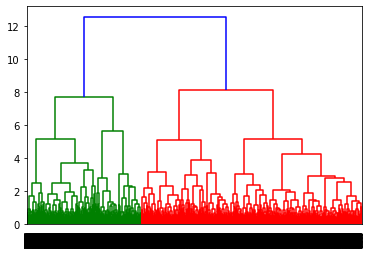

In [38]:
import scipy
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
dend=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(vectors)


In [40]:
# Giving Labels/assigning a cluster to each point/text 
temp = dfdb
temp['AVG-W2V Clus Label'] = cluster.labels_
temp.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_text,Cluster_Label,AVG-W2V Clus Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolut wonder silki sexi comfort,2,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretti happen find store im gl...,3,1


In [42]:
temp.groupby(['AVG-W2V Clus Label'])['Review Text'].count()


AVG-W2V Clus Label
0    8892
1    4738
2    5999
3    1548
4    1464
Name: Review Text, dtype: int64

In [43]:
# Reading a review which belong to each group.
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(temp.iloc[temp.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Review Text'])
    print('\n')
    print(temp.iloc[temp.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Review Text'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
Absolutely wonderful - silky and sexy and comfortable


Love this dress!  it's sooo p

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.
Note:
This Assignment uses "Women clothing e-Commerce Reviews"
"https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews"

K-means clustering works efficently with large datasets, it generalizes the model with more number of iterations, simple to understand and doesnot perform good with the missing values.
DBSCAN uses the concept of density, where sparse datasets doesnot perfrom efficently, and it handles with outliers and missing data. Hierarchical clustering is used to find the hierachies in the clusters.
